<a href="https://colab.research.google.com/github/pulkitsingh/Pokedex/blob/master/subset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting Google Drive

In [0]:
# mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


### Importing Libraries 

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, GlobalAveragePooling2D, BatchNormalization, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD, Adam, RMSprop
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import os
import numpy as np

Using TensorFlow backend.


### Loading Data

In [0]:
# directories for training and validation data
train_directory = 'balanced_data_clean/small_train'
validation_directory = 'balanced_data_clean/small_test'

In [0]:
# making ImageDataGenerator instances for training and test data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, 
                                   zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# loading the train and validation data
train_gen = train_datagen.flow_from_directory('balanced_data_clean/small_train',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              color_mode="rgb",                                            
                                              class_mode='categorical', 
                                              shuffle=True, seed=333)

test_gen = test_datagen.flow_from_directory('balanced_data_clean/small_test',
                                            target_size=(224, 224),
                                            color_mode = "rgb",
                                            batch_size=32,
                                            class_mode='categorical', 
                                            shuffle=True, seed=333)


Found 1844 images belonging to 20 classes.
Found 469 images belonging to 20 classes.


### Specifying the model

In [0]:
# specifying parameters
batch_size = 10
input_shape = (10, 224, 224, 3)
num_training_samples = 12903
num_test_samples = 3317

In [0]:
# specifying the model

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(20))
model.add(Activation('softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss=categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)   

### Training the Model

In [0]:
# making a directory to save weights
import os
dir_name = 'pokemon_weights/subset'
#os.mkdir(dir_name)
path = os.path.join(os.getcwd(), dir_name)
print(path)

/content/gdrive/My Drive/pokemon_weights/subset


In [0]:
filepath = os.path.join(path, "model-{epoch:02d}.hdf5")
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, 
                             save_best_only=False, save_weights_only=True, 
                             mode='auto', period=1)

In [0]:
history = model.fit_generator(train_gen, 
                    epochs=50,
                    workers=10,
                    use_multiprocessing=True,
                    shuffle=True,
                    callbacks=[checkpoint],
                    validation_data=test_gen,
                    validation_steps=1, 
                    verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


53/58 [==========================>...] - ETA: 8s - loss: 3.7042 - acc: 0.0599 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 94s 2s/step - loss: 3.6431 - acc: 0.0601 - val_loss: 2.9879 - val_acc: 0.1250

Epoch 00001: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-01.hdf5
Epoch 2/50
22/58 [==========>...................] - ETA: 8s - loss: 2.9928 - acc: 0.0696

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


53/58 [==========================>...] - ETA: 1s - loss: 2.9915 - acc: 0.0682

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 16s 284ms/step - loss: 2.9911 - acc: 0.0688 - val_loss: 2.9898 - val_acc: 0.0625

Epoch 00002: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-02.hdf5
Epoch 3/50
12/58 [=====>........................] - ETA: 19s - loss: 2.9773 - acc: 0.0510

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/58 [===========>..................] - ETA: 13s - loss: 2.9711 - acc: 0.0607

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 2.9665 - acc: 0.0727
Epoch 00002: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-02.hdf5
58/58 [==============================] - 20s 342ms/step - loss: 2.9664 - acc: 0.0725 - val_loss: 2.9032 - val_acc: 0.1875

Epoch 00003: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-03.hdf5
Epoch 4/50
36/58 [=================>............] - ETA: 8s - loss: 2.8883 - acc: 0.1087

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


53/58 [==========================>...] - ETA: 1s - loss: 2.8776 - acc: 0.1192

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 345ms/step - loss: 2.8667 - acc: 0.1262 - val_loss: 2.8752 - val_acc: 0.1562

Epoch 00004: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-04.hdf5
Epoch 5/50
14/58 [======>.......................] - ETA: 16s - loss: 2.7337 - acc: 0.1562

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


40/58 [===================>..........] - ETA: 5s - loss: 2.6990 - acc: 0.1900

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 18s 316ms/step - loss: 2.6648 - acc: 0.2129 - val_loss: 2.7198 - val_acc: 0.2188

Epoch 00005: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-05.hdf5
Epoch 6/50
15/58 [======>.......................] - ETA: 19s - loss: 2.4908 - acc: 0.2958

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50/58 [========================>.....] - ETA: 2s - loss: 2.4658 - acc: 0.2919

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 2.4578 - acc: 0.2922
Epoch 00005: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-05.hdf5
58/58 [==============================] - 20s 342ms/step - loss: 2.4510 - acc: 0.2947 - val_loss: 2.3255 - val_acc: 0.3125

Epoch 00006: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-06.hdf5
Epoch 7/50
10/58 [====>.........................] - ETA: 16s - loss: 2.1995 - acc: 0.3594

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/58 [=================>............] - ETA: 7s - loss: 2.1975 - acc: 0.3464

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 18s 313ms/step - loss: 2.2000 - acc: 0.3594 - val_loss: 2.1651 - val_acc: 0.3750

Epoch 00007: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-07.hdf5
Epoch 8/50
39/58 [===================>..........] - ETA: 7s - loss: 1.9965 - acc: 0.4127

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/58 [=====================>........] - ETA: 5s - loss: 1.9919 - acc: 0.4113

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 340ms/step - loss: 1.9558 - acc: 0.4187 - val_loss: 2.2361 - val_acc: 0.3125

Epoch 00008: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-08.hdf5
Epoch 9/50
 4/58 [=>............................] - ETA: 49s - loss: 1.7513 - acc: 0.4844 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/58 [===========>..................] - ETA: 13s - loss: 1.7364 - acc: 0.5026

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "



Epoch 00008: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-08.hdf5
58/58 [==============================] - 20s 341ms/step - loss: 1.7250 - acc: 0.4911 - val_loss: 2.6149 - val_acc: 0.2812

Epoch 00009: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-09.hdf5
Epoch 10/50
19/58 [========>.....................] - ETA: 15s - loss: 1.6542 - acc: 0.5263

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


53/58 [==========================>...] - ETA: 1s - loss: 1.6119 - acc: 0.5295

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 339ms/step - loss: 1.6010 - acc: 0.5302 - val_loss: 1.4200 - val_acc: 0.6562

Epoch 00010: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-10.hdf5
Epoch 11/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/58 [===========>..................] - ETA: 12s - loss: 1.4123 - acc: 0.5815

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 1.4846 - acc: 0.5634
Epoch 00010: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-10.hdf5
58/58 [==============================] - 20s 348ms/step - loss: 1.4842 - acc: 0.5650 - val_loss: 1.6923 - val_acc: 0.5625

Epoch 00011: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-11.hdf5
Epoch 12/50
 1/58 [..............................] - ETA: 2:53 - loss: 1.6443 - acc: 0.4688

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/58 [=================>............] - ETA: 8s - loss: 1.3987 - acc: 0.5941

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 336ms/step - loss: 1.3793 - acc: 0.5956 - val_loss: 1.7356 - val_acc: 0.4688

Epoch 00012: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-12.hdf5
Epoch 13/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


24/58 [===========>..................] - ETA: 13s - loss: 1.2173 - acc: 0.6333

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 342ms/step - loss: 1.2398 - acc: 0.6247 - val_loss: 1.3157 - val_acc: 0.6562

Epoch 00013: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-13.hdf5
Epoch 14/50
14/58 [======>.......................] - ETA: 19s - loss: 1.1277 - acc: 0.6210

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 1.1694 - acc: 0.6273
Epoch 00013: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-13.hdf5
58/58 [==============================] - 20s 343ms/step - loss: 1.1711 - acc: 0.6283 - val_loss: 2.0669 - val_acc: 0.4062

Epoch 00014: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-14.hdf5
Epoch 15/50
38/58 [==================>...........] - ETA: 6s - loss: 1.1161 - acc: 0.6515

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/58 [========================>.....] - ETA: 2s - loss: 1.0977 - acc: 0.6583

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 19s 320ms/step - loss: 1.0910 - acc: 0.6639 - val_loss: 0.8062 - val_acc: 0.6667

Epoch 00015: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-15.hdf5
Epoch 16/50
19/58 [========>.....................] - ETA: 13s - loss: 0.9926 - acc: 0.7000

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


48/58 [=======================>......] - ETA: 3s - loss: 0.9576 - acc: 0.7009

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 18s 317ms/step - loss: 0.9554 - acc: 0.7007 - val_loss: 1.7862 - val_acc: 0.6250

Epoch 00016: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-16.hdf5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 17/50
20/58 [=========>....................] - ETA: 15s - loss: 0.8381 - acc: 0.7453

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.9028 - acc: 0.7225
Epoch 00016: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-16.hdf5
58/58 [==============================] - 20s 342ms/step - loss: 0.9052 - acc: 0.7208 - val_loss: 1.9192 - val_acc: 0.5000

Epoch 00017: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-17.hdf5
Epoch 18/50
16/58 [=======>......................] - ETA: 19s - loss: 0.8827 - acc: 0.7090

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


33/58 [================>.............] - ETA: 9s - loss: 0.8733 - acc: 0.7295

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 351ms/step - loss: 0.8377 - acc: 0.7470 - val_loss: 2.2527 - val_acc: 0.5312

Epoch 00018: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-18.hdf5
Epoch 19/50
16/58 [=======>......................] - ETA: 13s - loss: 0.9163 - acc: 0.7363

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.8225 - acc: 0.7485
Epoch 00018: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-18.hdf5
58/58 [==============================] - 19s 323ms/step - loss: 0.8220 - acc: 0.7474 - val_loss: 1.4390 - val_acc: 0.6562

Epoch 00019: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-19.hdf5
Epoch 20/50
 8/58 [===>..........................] - ETA: 20s - loss: 0.8106 - acc: 0.7891

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


31/58 [===============>..............] - ETA: 9s - loss: 0.7488 - acc: 0.7833 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.7397 - acc: 0.7822
Epoch 00019: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-19.hdf5
58/58 [==============================] - 19s 319ms/step - loss: 0.7350 - acc: 0.7828 - val_loss: 1.8292 - val_acc: 0.5625

Epoch 00020: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-20.hdf5
Epoch 21/50
17/58 [=======>......................] - ETA: 16s - loss: 0.5797 - acc: 0.8290

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


38/58 [==================>...........] - ETA: 6s - loss: 0.6891 - acc: 0.7985

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 18s 314ms/step - loss: 0.6700 - acc: 0.8009 - val_loss: 1.6634 - val_acc: 0.5000

Epoch 00021: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-21.hdf5
Epoch 22/50
21/58 [=========>....................] - ETA: 12s - loss: 0.7550 - acc: 0.7929

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


45/58 [======================>.......] - ETA: 4s - loss: 0.7162 - acc: 0.7950

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.6879 - acc: 0.7981
Epoch 00021: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-21.hdf5
58/58 [==============================] - 18s 312ms/step - loss: 0.6855 - acc: 0.7984 - val_loss: 1.4208 - val_acc: 0.6562

Epoch 00022: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-22.hdf5
Epoch 23/50
15/58 [======>.......................] - ETA: 21s - loss: 0.6277 - acc: 0.8333

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/58 [============>.................] - ETA: 12s - loss: 0.5939 - acc: 0.8356

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 343ms/step - loss: 0.6216 - acc: 0.8211 - val_loss: 1.7300 - val_acc: 0.5938

Epoch 00023: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-23.hdf5
Epoch 24/50
38/58 [==================>...........] - ETA: 7s - loss: 0.5576 - acc: 0.8265

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/58 [===================>..........] - ETA: 7s - loss: 0.5519 - acc: 0.8285

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 339ms/step - loss: 0.5752 - acc: 0.8215 - val_loss: 2.4122 - val_acc: 0.5312

Epoch 00024: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-24.hdf5
Epoch 25/50
 1/58 [..............................] - ETA: 58s - loss: 0.5914 - acc: 0.8125

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/58 [======>.......................] - ETA: 14s - loss: 0.4974 - acc: 0.8558

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 18s 315ms/step - loss: 0.5374 - acc: 0.8318 - val_loss: 1.1511 - val_acc: 0.6875

Epoch 00025: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-25.hdf5
Epoch 26/50
 7/58 [==>...........................] - ETA: 17s - loss: 0.4815 - acc: 0.8705

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/58 [==========>...................] - ETA: 11s - loss: 0.5174 - acc: 0.8509

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 18s 317ms/step - loss: 0.5009 - acc: 0.8497 - val_loss: 1.3850 - val_acc: 0.6250

Epoch 00026: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-26.hdf5
Epoch 27/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 7/58 [==>...........................] - ETA: 30s - loss: 0.4364 - acc: 0.8661

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.4645 - acc: 0.8609
Epoch 00026: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-26.hdf5
58/58 [==============================] - 20s 340ms/step - loss: 0.4599 - acc: 0.8622 - val_loss: 1.6145 - val_acc: 0.6250

Epoch 00027: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-27.hdf5
Epoch 28/50
16/58 [=======>......................] - ETA: 19s - loss: 0.4600 - acc: 0.8691

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


41/58 [====================>.........] - ETA: 6s - loss: 0.3995 - acc: 0.8736

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.4311 - acc: 0.8641Epoch 28/50
Epoch 00027: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-27.hdf5
58/58 [==============================] - 20s 341ms/step - loss: 0.4337 - acc: 0.8627 - val_loss: 1.5768 - val_acc: 0.6250

Epoch 00028: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-28.hdf5
Epoch 29/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 5/58 [=>............................] - ETA: 44s - loss: 0.4949 - acc: 0.8688

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 349ms/step - loss: 0.4153 - acc: 0.8665 - val_loss: 1.2938 - val_acc: 0.6875

Epoch 00029: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-29.hdf5
Epoch 30/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/58 [======>.......................] - ETA: 19s - loss: 0.3933 - acc: 0.8625

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.3838 - acc: 0.8828Epoch 30/50

58/58 [==============================] - 20s 352ms/step - loss: 0.3807 - acc: 0.8837 - val_loss: 1.8397 - val_acc: 0.7619

Epoch 00030: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-30.hdf5
Epoch 31/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 2/58 [>.............................] - ETA: 3:01 - loss: 0.3985 - acc: 0.8438

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


26/58 [============>.................] - ETA: 16s - loss: 0.3888 - acc: 0.8798

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 22s 383ms/step - loss: 0.3662 - acc: 0.8870 - val_loss: 1.6931 - val_acc: 0.6562


Epoch 00031: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-31.hdf5
Epoch 32/50
37/58 [==================>...........] - ETA: 7s - loss: 0.3462 - acc: 0.8919

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


39/58 [===================>..........] - ETA: 7s - loss: 0.3382 - acc: 0.8950

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.3422 - acc: 0.8968
Epoch 00031: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-31.hdf5
58/58 [==============================] - 21s 357ms/step - loss: 0.3390 - acc: 0.8975 - val_loss: 1.3864 - val_acc: 0.6562

Epoch 00032: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-32.hdf5
Epoch 33/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


37/58 [==================>...........] - ETA: 7s - loss: 0.3903 - acc: 0.8875

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.3793 - acc: 0.8875
Epoch 00032: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-32.hdf5
58/58 [==============================] - 18s 312ms/step - loss: 0.3818 - acc: 0.8867 - val_loss: 2.2586 - val_acc: 0.6562

Epoch 00033: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-33.hdf5
Epoch 34/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


38/58 [==================>...........] - ETA: 7s - loss: 0.3867 - acc: 0.8898

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 342ms/step - loss: 0.3922 - acc: 0.8914 - val_loss: 1.5756 - val_acc: 0.5938

Epoch 00034: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-34.hdf5
Epoch 35/50
22/58 [==========>...................] - ETA: 14s - loss: 0.3144 - acc: 0.9105

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


41/58 [====================>.........] - ETA: 6s - loss: 0.2981 - acc: 0.9163

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 352ms/step - loss: 0.3197 - acc: 0.9118 - val_loss: 1.8452 - val_acc: 0.6562

Epoch 00035: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-35.hdf5
Epoch 36/50
 8/58 [===>..........................] - ETA: 26s - loss: 0.3096 - acc: 0.8984

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.2947 - acc: 0.9103
Epoch 00035: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-35.hdf5
58/58 [==============================] - 20s 340ms/step - loss: 0.2928 - acc: 0.9113 - val_loss: 1.4781 - val_acc: 0.6250

Epoch 00036: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-36.hdf5
Epoch 37/50
13/58 [=====>........................] - ETA: 19s - loss: 0.4153 - acc: 0.8659

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


35/58 [=================>............] - ETA: 9s - loss: 0.3284 - acc: 0.8948 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 342ms/step - loss: 0.3079 - acc: 0.8972 - val_loss: 3.4153 - val_acc: 0.5625

Epoch 00037: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-37.hdf5
Epoch 38/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/58 [=====>........................] - ETA: 20s - loss: 0.3458 - acc: 0.9034

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 342ms/step - loss: 0.3079 - acc: 0.8972 - val_loss: 3.4153 - val_acc: 0.5625
Epoch 38/50
58/58 [==============================] - 20s 349ms/step - loss: 0.3053 - acc: 0.9126 - val_loss: 1.8029 - val_acc: 0.7188

Epoch 00038: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-38.hdf5
Epoch 39/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/58 [===========>..................] - ETA: 15s - loss: 0.3131 - acc: 0.9175

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.3192 - acc: 0.9089
Epoch 00038: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-38.hdf5
58/58 [==============================] - 21s 367ms/step - loss: 0.3165 - acc: 0.9094 - val_loss: 1.5280 - val_acc: 0.6875

Epoch 00039: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-39.hdf5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 40/50
24/58 [===========>..................] - ETA: 10s - loss: 0.2512 - acc: 0.9128

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 19s 321ms/step - loss: 0.2512 - acc: 0.9206 - val_loss: 2.2611 - val_acc: 0.5938

Epoch 00040: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-40.hdf5
Epoch 41/50
 9/58 [===>..........................] - ETA: 25s - loss: 0.2501 - acc: 0.9062

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11/58 [====>.........................] - ETA: 21s - loss: 0.2376 - acc: 0.9148

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.2655 - acc: 0.9238
Epoch 41/50
58/58 [==============================] - 20s 346ms/step - loss: 0.2646 - acc: 0.9235 - val_loss: 2.2385 - val_acc: 0.6562

Epoch 00041: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-41.hdf5
Epoch 42/50
 4/58 [=>............................] - ETA: 59s - loss: 0.2582 - acc: 0.9062 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/58 [======>.......................] - ETA: 21s - loss: 0.2737 - acc: 0.9040

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 347ms/step - loss: 0.2538 - acc: 0.9226 - val_loss: 1.9577 - val_acc: 0.5938

Epoch 00042: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-42.hdf5
Epoch 43/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 19s 324ms/step - loss: 0.2585 - acc: 0.9186 - val_loss: 1.1709 - val_acc: 0.6875

Epoch 00043: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-43.hdf5
Epoch 44/50
46/58 [======================>.......] - ETA: 3s - loss: 0.2426 - acc: 0.9317

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


53/58 [==========================>...] - ETA: 1s - loss: 0.2391 - acc: 0.9348

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 18s 314ms/step - loss: 0.2340 - acc: 0.9356 - val_loss: 1.1071 - val_acc: 0.6562

Epoch 00044: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-44.hdf5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 45/50
57/58 [============================>.] - ETA: 0s - loss: 0.2294 - acc: 0.9265

58/58 [==============================] - 18s 317ms/step - loss: 0.2322 - acc: 0.9256 - val_loss: 3.0123 - val_acc: 0.5714

Epoch 00045: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-45.hdf5
Epoch 46/50
25/58 [===========>..................] - ETA: 16s - loss: 0.2209 - acc: 0.9400

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


46/58 [======================>.......] - ETA: 5s - loss: 0.2336 - acc: 0.9357

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.2420 - acc: 0.9344
Epoch 46/50
58/58 [==============================] - 23s 393ms/step - loss: 0.2396 - acc: 0.9350 - val_loss: 0.7528 - val_acc: 0.7812

Epoch 00046: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-46.hdf5
Epoch 47/50
 4/58 [=>............................] - ETA: 49s - loss: 0.3330 - acc: 0.9219 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


42/58 [====================>.........] - ETA: 6s - loss: 0.2024 - acc: 0.9482

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 344ms/step - loss: 0.1936 - acc: 0.9485 - val_loss: 1.5779 - val_acc: 0.7500

Epoch 00047: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-47.hdf5

Epoch 48/50
36/58 [=================>............] - ETA: 8s - loss: 0.2164 - acc: 0.9427

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


48/58 [=======================>......] - ETA: 3s - loss: 0.2290 - acc: 0.9447

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.2282 - acc: 0.9419

58/58 [==============================] - 20s 348ms/step - loss: 0.2274 - acc: 0.9418 - val_loss: 1.9013 - val_acc: 0.6875

Epoch 00048: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-48.hdf5
Epoch 49/50
34/58 [================>.............] - ETA: 9s - loss: 0.1773 - acc: 0.9421

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/58 [============================>.] - ETA: 0s - loss: 0.1986 - acc: 0.9390
Epoch 00048: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-48.hdf5
58/58 [==============================] - 20s 346ms/step - loss: 0.1995 - acc: 0.9390 - val_loss: 1.9676 - val_acc: 0.6875

Epoch 00049: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-49.hdf5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 50/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/58 [=====>........................] - ETA: 25s - loss: 0.2330 - acc: 0.9327

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


58/58 [==============================] - 20s 347ms/step - loss: 0.1605 - acc: 0.9499 - val_loss: 1.3164 - val_acc: 0.6562

Epoch 00050: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-50.hdf5

Epoch 00050: saving model to /content/gdrive/My Drive/pokemon_weights/subset/model-50.hdf5


In [0]:
print(np.argmax(history.history['val_acc']))
print(np.max(history.history['val_acc']))

45
0.78125


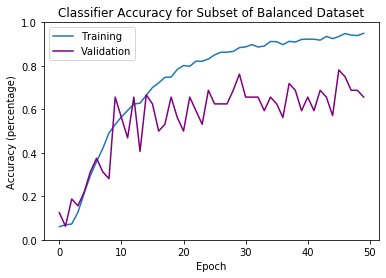

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label="Training")
plt.plot(history.history['val_acc'], label="Validation", c='purple')
plt.ylim((0, 1))
plt.ylabel("Accuracy (percentage)")
plt.xlabel("Epoch")
plt.title("Classifier Accuracy for Subset of Balanced Dataset")
plt.legend()


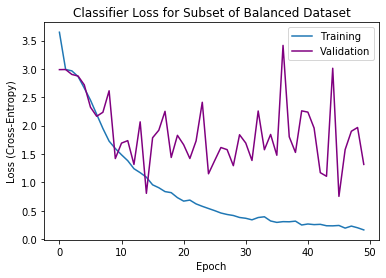

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation", c='purple')
plt.ylabel("Loss (Cross-Entropy)")
plt.xlabel("Epoch")
plt.title("Classifier Loss for Subset of Balanced Dataset")
plt.legend()

In [0]:
print(history.history)

{'val_loss': [3.8122141361236572, 3.860191822052002, 3.3222291469573975, 3.5263752937316895, 3.7408523559570312, 3.2110774517059326, 3.2849197387695312, 3.3840787410736084, 3.2399888038635254, 2.7523226737976074, 3.9328255653381348, 3.3875255584716797, 3.7173752784729004, 2.3088693618774414, 2.9514031410217285, 2.965082883834839, 3.218356132507324, 3.2856030464172363, 2.5234341621398926, 2.8770627975463867, 2.6191389560699463, 3.125389814376831, 3.543398380279541, 2.8423361778259277, 2.0446979999542236, 2.702136516571045, 3.4541993141174316, 2.947829246520996, 3.3966031074523926, 2.7653698921203613, 3.795637607574463, 3.3281092643737793, 3.7443575859069824, 2.878854513168335, 3.820699691772461, 2.878758430480957, 3.2802932262420654, 4.285663604736328, 2.563904285430908, 4.110161781311035, 4.485726356506348, 3.3735647201538086, 2.6641268730163574, 3.220952033996582, 3.400418758392334, 3.22044038772583, 3.3324215412139893, 3.229726791381836, 4.124174118041992, 2.6323513984680176, 3.97671

### Visualizing Class-Wise Accuracy

In [0]:
# getting the class labels for the model
classes = train_gen.class_indices

In [0]:
# making wrapper folders in order to evaluate class-wise accuracy
# for each pokemon in the dataset
path = 'balanced_data_clean/small_test'
for pokemon in os.listdir(path):
  if pokemon[0] != '.':

    # creating a wrapper folder in the directory
    wrapper_dir = os.path.join(path, "wrapper_{}".format(pokemon))
    os.mkdir(wrapper_dir)

    # moving the current folder to inside the wrapper folder
    cur_dir = os.path.join(path, pokemon)
    new_dir = os.path.join(wrapper_dir, pokemon)
    os.rename(cur_dir, new_dir)

In [0]:
# evaluating class-wise accuracy
accuracy = {}

# for each pokemon in the directory
for pokemon in os.listdir(path):
  if pokemon[0] != '.':

    # creating a data generator for just that class
    test_gen = test_datagen.flow_from_directory(path + '/{}'.format(pokemon),
                                            target_size=(224, 224),
                                            color_mode = "rgb",
                                            batch_size=32,
                                            class_mode='categorical', 
                                            shuffle=True, seed=333)
    
    # getting the output of the model on that class
    output = model.predict_generator(test_gen, workers=4, 
                                     use_multiprocessing=True, verbose=1)
    
    # getting prediction from class outputs
    preds = np.argmax(output, axis=1)

    # computing number of correct predictions
    pokemon_name = pokemon.replace("wrapper_", "")
    correct = np.count_nonzero(preds == classes[pokemon_name])

    # calculating accuracy as number of correct predictions/ total predictions
    acc = correct / np.size(preds)

    # saving accuracy in the dictionary
    accuracy[pokemon] = acc

    # printing results
    print("{}: {}. Correct = {}, Total = {}".format(pokemon, acc, correct, 
                                                    np.size(preds)))

    



Found 18 images belonging to 1 classes.
1/1 [==============================] - 1s 799ms/step
wrapper_Zubat: 0.7222222222222222. Correct = 13, Total = 18
Found 22 images belonging to 1 classes.
1/1 [==============================] - 1s 710ms/step
wrapper_Machamp: 0.6363636363636364. Correct = 14, Total = 22
Found 20 images belonging to 1 classes.
1/1 [==============================] - 0s 429ms/step
wrapper_Doduo: 0.5. Correct = 10, Total = 20
Found 24 images belonging to 1 classes.
1/1 [==============================] - 1s 687ms/step
wrapper_Gloom: 0.6666666666666666. Correct = 16, Total = 24
Found 19 images belonging to 1 classes.
1/1 [==============================] - 1s 672ms/step
wrapper_Tentacruel: 0.8421052631578947. Correct = 16, Total = 19
Found 21 images belonging to 1 classes.
1/1 [==============================] - 0s 408ms/step
wrapper_Sandshrew: 0.38095238095238093. Correct = 8, Total = 21
Found 21 images belonging to 1 classes.
1/1 [==============================] - 0s 383m

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1/1 [==============================] - 1s 1s/step
wrapper_Pikachu: 0.71875. Correct = 23, Total = 32
Found 30 images belonging to 1 classes.
1/1 [==============================] - 1s 1s/step
wrapper_Squirtle: 0.8333333333333334. Correct = 25, Total = 30
Found 28 images belonging to 1 classes.
1/1 [==============================] - 1s 1s/step
wrapper_Mewtwo: 0.6785714285714286. Correct = 19, Total = 28
Found 22 images belonging to 1 classes.
1/1 [==============================] - 0s 414ms/step
wrapper_Geodude: 0.5909090909090909. Correct = 13, Total = 22
Found 22 images belonging to 1 classes.
1/1 [==============================] - 1s 501ms/step
wrapper_Koffing: 0.7727272727272727. Correct = 17, Total = 22
Found 24 images belonging to 1 classes.
1/1 [==============================] - 0s 468ms/step
wrapper_Pidgey: 0.625. Correct = 15, Total = 24
Found 24 images belonging to 1 classes.
1/1 [==============================] - 0s 426ms/step
wrapper_Psyduck: 0.5833333333333334. Correct = 14, 

In [0]:
print(accuracy.items())

dict_items([('wrapper_Zubat', 0.7222222222222222), ('wrapper_Machamp', 0.6363636363636364), ('wrapper_Doduo', 0.5), ('wrapper_Gloom', 0.6666666666666666), ('wrapper_Tentacruel', 0.8421052631578947), ('wrapper_Sandshrew', 0.38095238095238093), ('wrapper_Vileplume', 0.38095238095238093), ('wrapper_Snorlax', 0.6363636363636364), ('wrapper_Voltorb', 0.7727272727272727), ('wrapper_Charmander', 0.8709677419354839), ('wrapper_Pikachu', 0.71875), ('wrapper_Squirtle', 0.8333333333333334), ('wrapper_Mewtwo', 0.6785714285714286), ('wrapper_Geodude', 0.5909090909090909), ('wrapper_Koffing', 0.7727272727272727), ('wrapper_Pidgey', 0.625), ('wrapper_Psyduck', 0.5833333333333334), ('wrapper_Arbok', 0.75), ('wrapper_Exeggcute', 0.6818181818181818), ('wrapper_Dragonite', 0.47619047619047616)])


In [0]:
np.histogram(list(accuracy.values()))

(array([2, 1, 1, 0, 3, 3, 4, 3, 0, 3]),
 array([0.38095238, 0.42995392, 0.47895545, 0.52795699, 0.57695853,
        0.62596006, 0.6749616 , 0.72396313, 0.77296467, 0.82196621,
        0.87096774]))

Text(0.5, 1.0, 'Class-Wise Test Accuracy for Subset of Data')

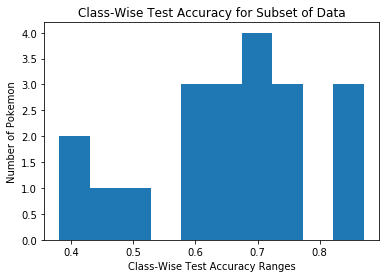

In [0]:
plt.hist(list(accuracy.values()), bins=10, histtype='bar')
plt.xlabel("Class-Wise Test Accuracy Ranges")
plt.ylabel("Number of Pokemon")
plt.title("Class-Wise Test Accuracy for Subset of Data")

### Exploring link Between Number of Training Image and Test Accuracy

In [0]:
# creating a dictionary with number of training examples per pokemon
counts = {}
for pokemon in os.listdir('balanced_data_clean/small_train'):
    if pokemon[0] != '.':
      name = pokemon.replace("wrapper_", "")
      counts[name] = len(os.listdir('balanced_data_clean/small_train/{}'.format(pokemon)))

In [0]:
print(counts.items())

dict_items([('Dragonite', 84), ('Exeggcute', 88), ('Arbok', 93), ('Psyduck', 94), ('Pidgey', 95), ('Geodude', 84), ('Koffing', 85), ('Mewtwo', 110), ('Squirtle', 119), ('Charmander', 122), ('Pikachu', 126), ('Voltorb', 86), ('Snorlax', 88), ('Sandshrew', 80), ('Tentacruel', 79), ('Gloom', 94), ('Vileplume', 84), ('Doduo', 78), ('Machamp', 85), ('Zubat', 70)])


Text(0.5, 1.0, 'Number of Training Examples vs. Test Accuracy')

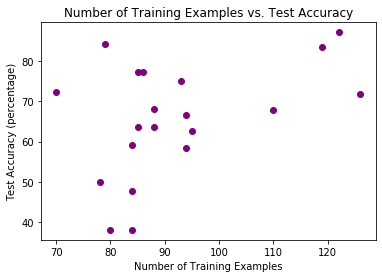

In [0]:
# plotting number of training examples vs accuracy
acc, freq = [], []

for pokemon in os.listdir('balanced_data_clean/small_test'):
  if pokemon[0] != '.':
    name = pokemon.replace("wrapper_", "")
    freq.append(counts[name])
    acc.append(accuracy[pokemon] * 100)

plt.scatter(freq, acc, c='purple')
plt.xlabel("Number of Training Examples")
plt.ylabel("Test Accuracy (percentage)")
plt.title("Number of Training Examples vs. Test Accuracy")